# Heart Disease Assessment

![title](img/Heart.png)

# Introduction

Of all the applications of machine-learning, diagnosing any serious disease using a black box is always going to be a hard sell. If the output from a model is the particular course of treatment (potentially with side-effects), or surgery, or the absence of treatment, people are going to want to know why.              In addition, we will analyze for this dataset. We will use a wide range of tools for this part. If there's value in there, we'il do it there. Finally, machine learning algorithms are estimated.

This dataset gives a number of variables along with a target condition of having or not having heart disease.

## Variables used

##### 1.male : 1 if it's a male and 0 if it is a female.
##### 2.age: The person's age in years.
##### 3.education : Tells us about the level of education of an individual.
##### 4.currentSmoker : will give 1 if the individual still smokes and it will give 0 if the individual is not a current smoker.
##### 5.cigsPerDay : Gives us idea of the number of cigarettes an individual smokes in a day.
##### 6.BPmeds : Tells us if an individual is taking medications for BP or not.
##### 7.prevalentStroke	: Gives information regarding an individual if he has suffered any stroke earlier.
##### 8.prevalentHyp : Gives information regarding an individual if he has any prevalent pressure related issues.
##### 9.diabetes : Gives information regarding an individual if he has diabetes or not.
##### 10.totChol : Gives information regarding total cholestrol consumed by an individual.
##### 11.sysBP : Gives information regarding the BP level of an individual of one type.
##### 12.diaBP : Gives information regarding the BP level of an individual of another type.
##### 13.BMI : Gives information regarding the BMI of an individual.
##### 14.heartRate : Gives information regarding the heart rate of an individual.
##### 15.glucose : Gives information regarding the glucose level contained by an individual in his/her body.
##### 16.HeartDisease : Tells us if an individual has heart attack or not(Target Variable)

#### INVESTIGATING THE DATA and EXPLORATORY DATA ANALSIS
First, I install all the libraries that I will be using in my application. I install all the libraries in the first part because I will be using the algorithms later and the analysis will make clear what should be done.Furthurmore, I have investigated the data, presented some visualization and analysed features. Let's write it. I will import necessary Python modules and read the data.

# Data Understanding

In [1]:
#Importing libraries
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
from pandas import read_csv
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.externals.joblib import dump
from sklearn.externals.joblib import load
from datetime import datetime

C:\Users\Windows 10\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
# Importing the Dataset
startTimeScript = datetime.now()
df = pd.read_csv('Heart_Disease.csv')

In [3]:
# Describing the dataset
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Heart Disease
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [4]:
df.shape

(4240, 16)

In [5]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Heart Disease
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [6]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
Heart Disease        0
dtype: int64

In [7]:
countFemale = len(df[df.male == 0])
countMale = len(df[df.male == 1])
print("Percentage of Female Patients: {:.2f}%".format((countFemale / (len(df.male))*100)))
print("Percentage of Male Patients: {:.2f}%".format((countMale / (len(df.male))*100)))

Percentage of Female Patients: 57.08%
Percentage of Male Patients: 42.92%


## Data Preparation

#### Source: The dataset is publically available on the Kaggle website, and it is from an ongoing ongoing cardiovascular study. The classification goal is to predict whether the patient has risk of future coronary heart disease (CHD).The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes.

#### Treat Missing values

In [8]:
# Replace Missing values in ‘glucose’ using Mean
missing_val_glu = df[['glucose']]
mean_glu = df[['glucose']].mean()
d_glu = missing_val_glu.fillna(mean_glu)
v_glu = round(d_glu)
v_glu

,glucose
0,77.0
1,76.0
2,70.0
3,103.0
4,85.0
5,99.0
6,85.0
7,78.0
8,79.0
9,88.0


In [9]:
df['glucose'] = v_glu
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Heart Disease
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [11]:
# Replace Missing values in ‘education’ using Mode
missing_val_edu = df[['education']]
mode_edu = df[['education']].mode()
d_edu = missing_val_edu.fillna(1.0) # As 1.0 is the mode
v_edu = round(d_edu)
v_edu.head()

,education
0,4.0
1,2.0
2,1.0
3,3.0
4,3.0


In [12]:
df['education'] = v_edu
df.head(50)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Heart Disease
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


In [13]:
# Replace Missing values in ‘cigsPerDay’ using Mean
missing_val_cig = df[['cigsPerDay']]
mean_cig = df[['cigsPerDay']].mean()
d_cig = missing_val_cig.fillna(mean_cig)
v_cig = round(d_cig)
v_cig

,cigsPerDay
0,0.0
1,0.0
2,20.0
3,30.0
4,23.0
5,0.0
6,0.0
7,20.0
8,0.0
9,30.0


In [14]:
df['cigsPerDay'] = v_cig
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Heart Disease
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [15]:
df.isnull().sum()

male                0
age                 0
education           0
currentSmoker       0
cigsPerDay          0
BPMeds             53
prevalentStroke     0
prevalentHyp        0
diabetes            0
totChol            50
sysBP               0
diaBP               0
BMI                19
heartRate           1
glucose             0
Heart Disease       0
dtype: int64

In [16]:
# Replace Missing values in ‘BPMeds’ using Mode
missing_val_bpmeds = df[['BPMeds']]
mode_bpmeds = df[['BPMeds']].mode()
d_bpmeds = missing_val_bpmeds.fillna(0.0) # As 0.0 is the mode
v_bpmeds = round(d_bpmeds)
v_bpmeds.head()

,BPMeds
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [17]:
mode_bpmeds

,BPMeds
0,0.0


In [18]:
df['BPMeds'] = v_bpmeds
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Heart Disease
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [19]:
# Replace Missing values in ‘totChol’ using Mode
missing_val_totChol = df[['totChol']]
mean_totChol = df[['totChol']].mean()
d_totChol = missing_val_totChol.fillna(mean_totChol) 
v_totChol = round(d_totChol)
v_totChol.head(50)

,totChol
0,195.0
1,250.0
2,245.0
3,225.0
4,285.0
5,228.0
6,205.0
7,313.0
8,260.0
9,225.0


In [20]:
df['totChol'] = v_totChol
df.head(50)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Heart Disease
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


In [21]:
# Replace Missing values in ‘BMI’ using Mean
missing_val_BMI = df[['BMI']]
mean_BMI = df[['BMI']].mean()
d_BMI = missing_val_BMI.fillna(mean_BMI) 
d_BMI.head()

,BMI
0,26.97
1,28.73
2,25.34
3,28.58
4,23.10


In [22]:
df['BMI'] = d_BMI
df.head(105)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Heart Disease
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.970000,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.730000,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.340000,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.580000,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.100000,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.300000,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.110000,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.680000,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.360000,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.610000,93.0,88.0,0


In [23]:
df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          1
glucose            0
Heart Disease      0
dtype: int64

In [24]:
# Replace Missing values in ‘heartRate’ using Mean
missing_val_heartRate = df[['heartRate']]
mean_heartRate = df[['heartRate']].mean()
d_heartRate = missing_val_heartRate.fillna(mean_heartRate) 
v_heartRate = round(d_heartRate)
v_heartRate.head()

,heartRate
0,80.0
1,95.0
2,75.0
3,65.0
4,85.0


In [25]:
df['heartRate'] = v_heartRate
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Heart Disease
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


##### Unique values for all categorical features

In [26]:
df['education'].unique()

array([4., 2., 1., 3.])

In [27]:
df['prevalentStroke'].unique()

array([0, 1], dtype=int64)

In [28]:
df['BPMeds'].unique()

array([0., 1.])

In [29]:
df['prevalentHyp'].unique()

array([0, 1], dtype=int64)

In [30]:
df['diabetes'].unique()

array([0, 1], dtype=int64)

In [31]:
df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
Heart Disease      0
dtype: int64

In [32]:
df.dtypes

male                 int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
Heart Disease        int64
dtype: object

### Data Visualization

In [33]:
correlations = df.corr()

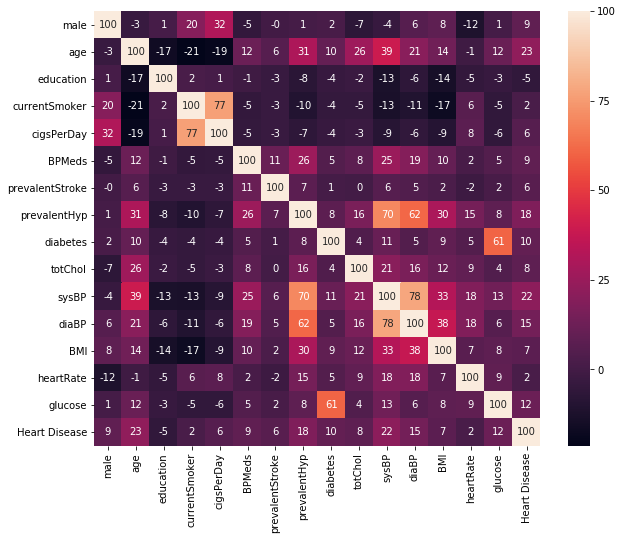

In [34]:
# Correlation Matrix of Dataset
plt.figure(figsize=(10,8))
correlations = correlations * 100
sns.heatmap(correlations,annot = True,fmt = '.0f')

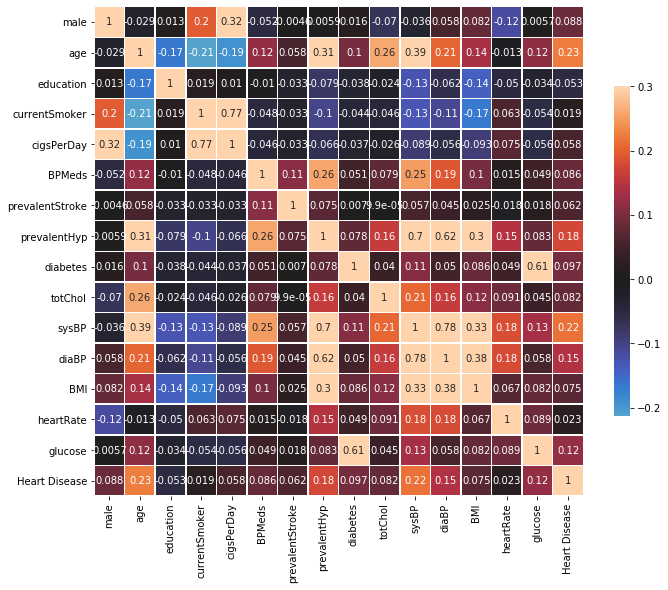

In [35]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True)
plt.tight_layout()
plt.show()

In [36]:
df = df.drop(columns = ['currentSmoker','diaBP'])

### Univariate Analysis

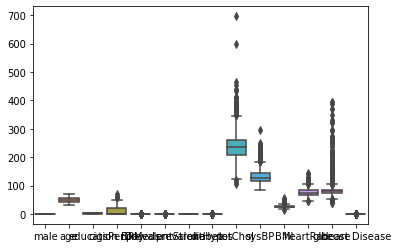

In [37]:
sns.boxplot(data = df)

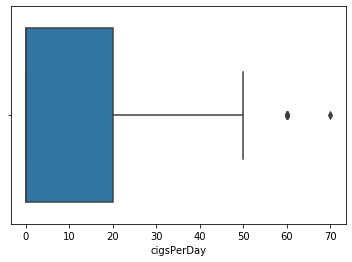

In [38]:
sns.boxplot('cigsPerDay',data = df)

In [39]:
q1,q3 = np.percentile(df['cigsPerDay'],[25,75])

In [40]:
IQR = q3 - q1
LTV = q1 - 1.5 * IQR
UTV = q3 + 1.5 * IQR
q1,q3,IQR,LTV,UTV

(0.0, 20.0, 20.0, -30.0, 50.0)

In [41]:
df['cigsPerDay'] = df['cigsPerDay'].mask(df['cigsPerDay']>UTV,UTV)

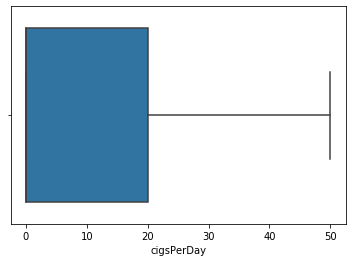

In [42]:
sns.boxplot('cigsPerDay',data = df)

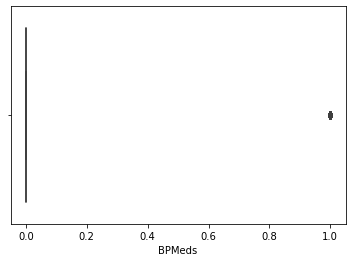

In [43]:
sns.boxplot('BPMeds',data = df)

In [44]:
q1,q3 = np.percentile(df['BPMeds'],[25,75])

In [45]:
IQR = q3 - q1
LTV = q1 - 1.5 * IQR
UTV = q3 + 1.5 * IQR
q1,q3,IQR,LTV,UTV

(0.0, 0.0, 0.0, 0.0, 0.0)

In [46]:
df['BPMeds'] = df['BPMeds'].mask(df['BPMeds']>UTV,UTV)

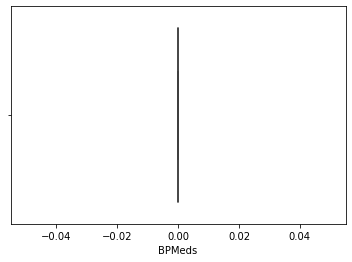

In [47]:
sns.boxplot('BPMeds',data = df)

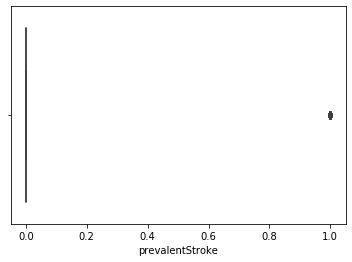

In [48]:
sns.boxplot('prevalentStroke',data = df)

In [49]:
q1,q3 = np.percentile(df['prevalentStroke'],[25,75])

In [50]:
IQR = q3 - q1
LTV = q1 - 1.5 * IQR
UTV = q3 + 1.5 * IQR
q1,q3,IQR,LTV,UTV

(0.0, 0.0, 0.0, 0.0, 0.0)

In [51]:
df['prevalentStroke'] = df['prevalentStroke'].mask(df['prevalentStroke']>UTV,UTV)

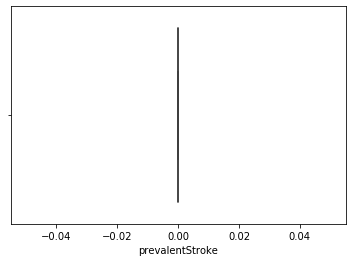

In [52]:
sns.boxplot('prevalentStroke',data = df)

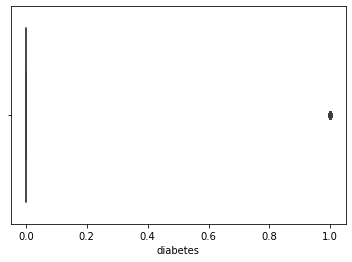

In [53]:
sns.boxplot('diabetes',data = df)

In [54]:
q1,q3 = np.percentile(df['diabetes'],[25,75])

In [55]:
IQR = q3 - q1
LTV = q1 - 1.5 * IQR
UTV = q3 + 1.5 * IQR
q1,q3,IQR,LTV,UTV

(0.0, 0.0, 0.0, 0.0, 0.0)

In [56]:
df['diabetes'] = df['diabetes'].mask(df['diabetes']>UTV,UTV)

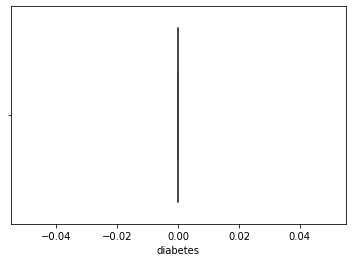

In [57]:
sns.boxplot('diabetes',data = df)

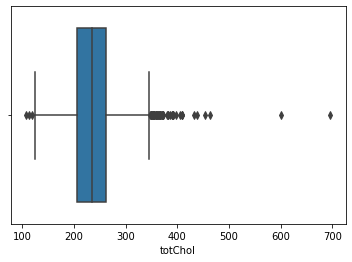

In [58]:
sns.boxplot('totChol',data = df)

In [59]:
q1,q3 = np.percentile(df['totChol'],[25,75])

In [60]:
IQR = q3 - q1
LTV = q1 - 1.5 * IQR
UTV = q3 + 1.5 * IQR
q1,q3,IQR,LTV,UTV

(206.0, 262.0, 56.0, 122.0, 346.0)

In [61]:
df['totChol'] = df['totChol'].mask(df['totChol']>UTV,UTV)

In [62]:
df['totChol'] = df['totChol'].mask(df['totChol']<LTV,LTV)

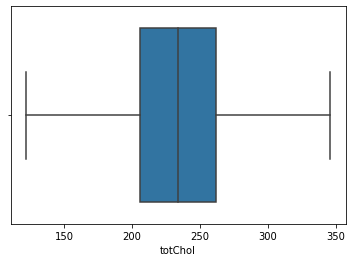

In [63]:
sns.boxplot('totChol',data = df)

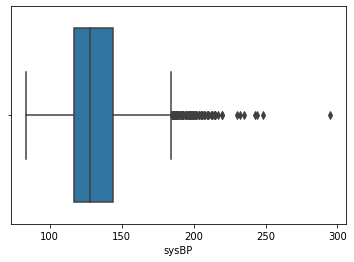

In [64]:
sns.boxplot('sysBP',data = df)

In [65]:
q1,q3 = np.percentile(df['sysBP'],[25,75])

In [66]:
IQR = q3 - q1
LTV = q1 - 1.5 * IQR
UTV = q3 + 1.5 * IQR
q1,q3,IQR,LTV,UTV

(117.0, 144.0, 27.0, 76.5, 184.5)

In [67]:
df['sysBP'] = df['sysBP'].mask(df['sysBP']>UTV,UTV)

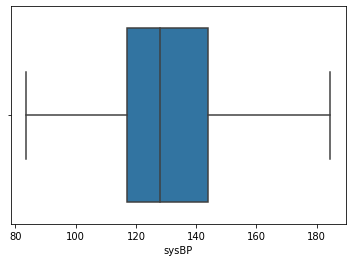

In [68]:
sns.boxplot('sysBP',data = df)

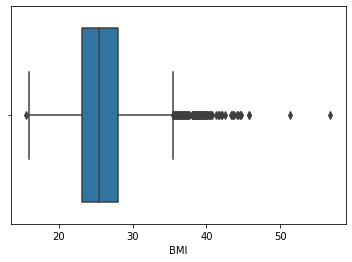

In [69]:
sns.boxplot('BMI',data = df)

In [70]:
q1,q3 = np.percentile(df['BMI'],[25,75])

In [71]:
IQR = q3 - q1
LTV = q1 - 1.5 * IQR
UTV = q3 + 1.5 * IQR
q1,q3,IQR,LTV,UTV

(23.0775, 28.0325, 4.954999999999998, 15.645000000000003, 35.464999999999996)

In [72]:
df['BMI'] = df['BMI'].mask(df['BMI']>UTV,UTV)

In [73]:
df['BMI'] = df['BMI'].mask(df['BMI']<LTV,LTV)

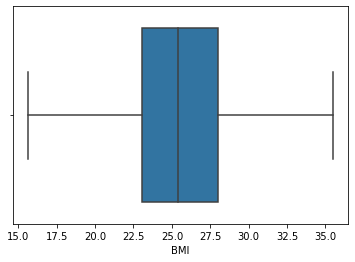

In [74]:
sns.boxplot('BMI',data = df)

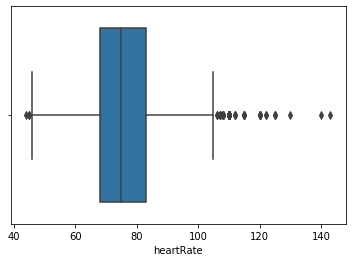

In [75]:
sns.boxplot('heartRate',data = df)

In [76]:
q1,q3 = np.percentile(df['heartRate'],[25,75])

In [77]:
IQR = q3 - q1
LTV = q1 - 1.5 * IQR
UTV = q3 + 1.5 * IQR
q1,q3,IQR,LTV,UTV

(68.0, 83.0, 15.0, 45.5, 105.5)

In [78]:
df['heartRate'] = df['heartRate'].mask(df['heartRate']>UTV,UTV)

In [79]:
df['heartRate'] = df['heartRate'].mask(df['heartRate']<LTV,LTV)

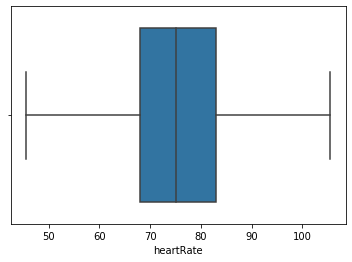

In [80]:
sns.boxplot('heartRate',data = df)

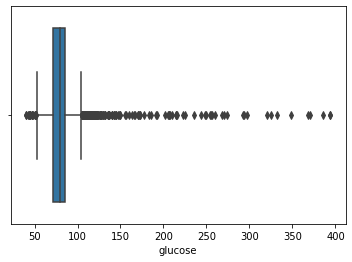

In [81]:
sns.boxplot('glucose',data = df)

In [82]:
q1,q3 = np.percentile(df['glucose'],[25,75])

In [83]:
IQR = q3 - q1
LTV = q1 - 1.5 * IQR
UTV = q3 + 1.5 * IQR
q1,q3,IQR,LTV,UTV

(72.0, 85.0, 13.0, 52.5, 104.5)

In [84]:
df['glucose'] = df['glucose'].mask(df['glucose']>UTV,UTV)

In [85]:
df['glucose'] = df['glucose'].mask(df['glucose']<LTV,LTV)

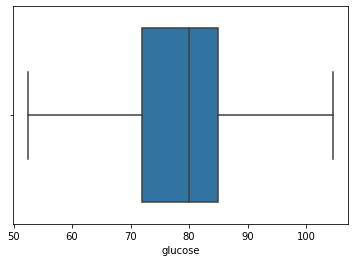

In [86]:
sns.boxplot('glucose',data = df)

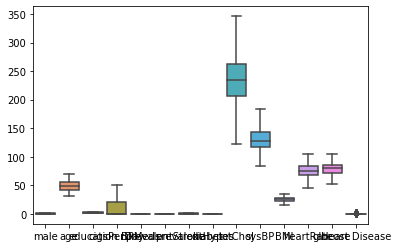

In [89]:
sns.boxplot(data = df)

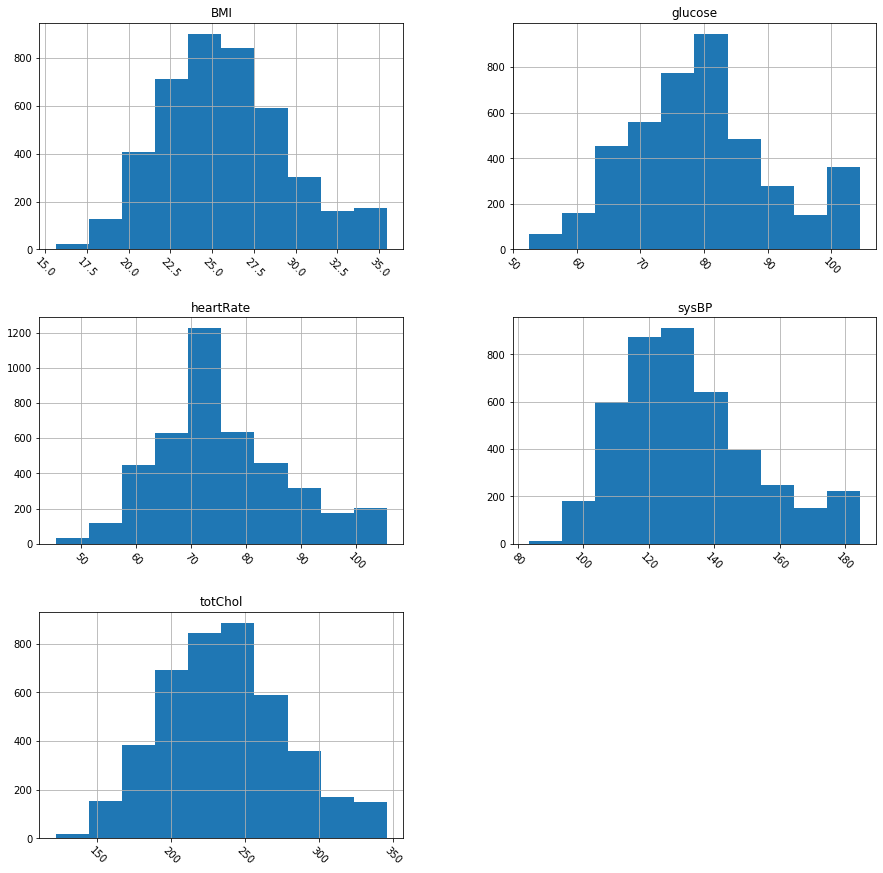

In [90]:
from matplotlib import pyplot
x = df[['totChol','sysBP','BMI','heartRate','glucose']]
x.hist(xrot = -45,figsize = (15,15))
pyplot.show()

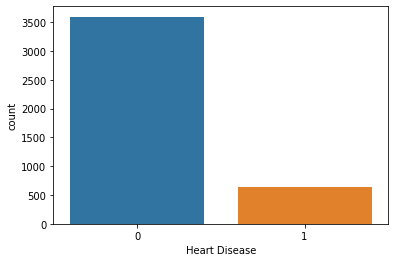

In [91]:
sns.countplot(df['Heart Disease']);

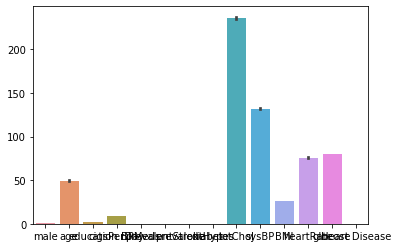

In [94]:
##Plot some Categorical plots using sea born
sns.barplot(data = df )

#### Converting categorical data to numerical data

In [95]:
# Converting Categorical Data of 'education' with one hot-encoded data
from sklearn.preprocessing import LabelBinarizer
df_one_hot = df
lb = LabelBinarizer()
lb_results = lb.fit_transform(df_one_hot['education'])
lb_results_df = pd.DataFrame(lb_results, columns=lb.classes_)
lb_results_df.head()

,1.0,2.0,3.0,4.0
0,0,0,0,1
1,0,1,0,0
2,1,0,0,0
3,0,0,1,0
4,0,0,1,0


In [96]:
df_en = pd.concat([df_one_hot.reset_index(drop=True),lb_results_df.reset_index(drop=True)],axis = 1)

In [97]:
df_en.head()

,male,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,BMI,heartRate,glucose,Heart Disease,1.0,2.0,3.0,4.0
0,1,39,4.0,0.0,0.0,0,0,0,195.0,106.0,26.97,80.0,77.0,0,0,0,0,1
1,0,46,2.0,0.0,0.0,0,0,0,250.0,121.0,28.73,95.0,76.0,0,0,1,0,0
2,1,48,1.0,20.0,0.0,0,0,0,245.0,127.5,25.34,75.0,70.0,0,1,0,0,0
3,0,61,3.0,30.0,0.0,0,1,0,225.0,150.0,28.58,65.0,103.0,1,0,0,1,0
4,0,46,3.0,23.0,0.0,0,0,0,285.0,130.0,23.10,85.0,85.0,0,0,0,1,0


In [98]:
new_column = df_en['Heart Disease']
df_en['Heart'] = new_column

In [99]:
df_en.head()

,male,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,BMI,heartRate,glucose,Heart Disease,1.0,2.0,3.0,4.0,Heart
0,1,39,4.0,0.0,0.0,0,0,0,195.0,106.0,26.97,80.0,77.0,0,0,0,0,1,0
1,0,46,2.0,0.0,0.0,0,0,0,250.0,121.0,28.73,95.0,76.0,0,0,1,0,0,0
2,1,48,1.0,20.0,0.0,0,0,0,245.0,127.5,25.34,75.0,70.0,0,1,0,0,0,0
3,0,61,3.0,30.0,0.0,0,1,0,225.0,150.0,28.58,65.0,103.0,1,0,0,1,0,1
4,0,46,3.0,23.0,0.0,0,0,0,285.0,130.0,23.10,85.0,85.0,0,0,0,1,0,0


In [100]:
df_en.pop('Heart Disease')

0       0
1       0
2       0
3       1
4       0
5       0
6       1
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      1
16      0
17      1
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      1
26      0
27      0
28      1
29      0
       ..
4210    0
4211    0
4212    0
4213    1
4214    1
4215    0
4216    0
4217    0
4218    0
4219    0
4220    1
4221    1
4222    0
4223    1
4224    0
4225    0
4226    1
4227    0
4228    0
4229    0
4230    0
4231    0
4232    1
4233    1
4234    0
4235    0
4236    0
4237    0
4238    0
4239    0
Name: Heart Disease, Length: 4240, dtype: int64

In [101]:
df_en.head()

,male,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,BMI,heartRate,glucose,1.0,2.0,3.0,4.0,Heart
0,1,39,4.0,0.0,0.0,0,0,0,195.0,106.0,26.97,80.0,77.0,0,0,0,1,0
1,0,46,2.0,0.0,0.0,0,0,0,250.0,121.0,28.73,95.0,76.0,0,1,0,0,0
2,1,48,1.0,20.0,0.0,0,0,0,245.0,127.5,25.34,75.0,70.0,1,0,0,0,0
3,0,61,3.0,30.0,0.0,0,1,0,225.0,150.0,28.58,65.0,103.0,0,0,1,0,1
4,0,46,3.0,23.0,0.0,0,0,0,285.0,130.0,23.10,85.0,85.0,0,0,1,0,0


In [102]:
df_en = df_en.rename(columns = {'Heart':'Heart Disease'})

In [103]:
df_en.head()

,male,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,BMI,heartRate,glucose,1.0,2.0,3.0,4.0,Heart Disease
0,1,39,4.0,0.0,0.0,0,0,0,195.0,106.0,26.97,80.0,77.0,0,0,0,1,0
1,0,46,2.0,0.0,0.0,0,0,0,250.0,121.0,28.73,95.0,76.0,0,1,0,0,0
2,1,48,1.0,20.0,0.0,0,0,0,245.0,127.5,25.34,75.0,70.0,1,0,0,0,0
3,0,61,3.0,30.0,0.0,0,1,0,225.0,150.0,28.58,65.0,103.0,0,0,1,0,1
4,0,46,3.0,23.0,0.0,0,0,0,285.0,130.0,23.10,85.0,85.0,0,0,1,0,0


In [104]:
df_en.pop('education')

0       4.0
1       2.0
2       1.0
3       3.0
4       3.0
5       2.0
6       1.0
7       2.0
8       1.0
9       1.0
10      1.0
11      2.0
12      1.0
13      3.0
14      2.0
15      2.0
16      3.0
17      2.0
18      2.0
19      2.0
20      2.0
21      1.0
22      1.0
23      3.0
24      2.0
25      4.0
26      1.0
27      2.0
28      3.0
29      1.0
       ... 
4210    1.0
4211    2.0
4212    2.0
4213    2.0
4214    3.0
4215    1.0
4216    3.0
4217    1.0
4218    1.0
4219    1.0
4220    1.0
4221    1.0
4222    3.0
4223    4.0
4224    2.0
4225    4.0
4226    1.0
4227    4.0
4228    1.0
4229    3.0
4230    1.0
4231    3.0
4232    1.0
4233    1.0
4234    3.0
4235    2.0
4236    1.0
4237    2.0
4238    3.0
4239    3.0
Name: education, Length: 4240, dtype: float64

In [105]:
df_en

,male,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,BMI,heartRate,glucose,1.0,2.0,3.0,4.0,Heart Disease
0,1,39,0.0,0.0,0,0,0,195.0,106.0,26.970,80.0,77.0,0,0,0,1,0
1,0,46,0.0,0.0,0,0,0,250.0,121.0,28.730,95.0,76.0,0,1,0,0,0
2,1,48,20.0,0.0,0,0,0,245.0,127.5,25.340,75.0,70.0,1,0,0,0,0
3,0,61,30.0,0.0,0,1,0,225.0,150.0,28.580,65.0,103.0,0,0,1,0,1
4,0,46,23.0,0.0,0,0,0,285.0,130.0,23.100,85.0,85.0,0,0,1,0,0
5,0,43,0.0,0.0,0,1,0,228.0,180.0,30.300,77.0,99.0,0,1,0,0,0
6,0,63,0.0,0.0,0,0,0,205.0,138.0,33.110,60.0,85.0,1,0,0,0,1
7,0,45,20.0,0.0,0,0,0,313.0,100.0,21.680,79.0,78.0,0,1,0,0,0
8,1,52,0.0,0.0,0,1,0,260.0,141.5,26.360,76.0,79.0,1,0,0,0,0
9,1,43,30.0,0.0,0,1,0,225.0,162.0,23.610,93.0,88.0,1,0,0,0,0


In [106]:
# Apply Standard Scalar function to the Numerical Columns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(scaler.fit(df[['age','cigsPerDay','totChol','sysBP','BMI','heartRate','glucose']]))

StandardScaler(copy=True, with_mean=True, with_std=True)


In [107]:
print(scaler.transform(df[['age','cigsPerDay','totChol','sysBP','BMI','heartRate','glucose']]))

[[-1.23428297 -0.76327415 -0.97427066 ...  0.33111914  0.36563925
  -0.24569333]
 [-0.41766419 -0.76327415  0.32616216 ...  0.79580844  1.65641724
  -0.3329266 ]
 [-0.18434454  0.93757063  0.20794099 ... -0.09924652 -0.06462008
  -0.85632621]
 ...
 [ 0.28229477 -0.76327415  0.77540259 ... -1.12103494  0.36563925
   2.15322159]
 [-1.11762315 -0.76327415 -1.21071299 ... -0.03059924 -0.75303501
  -0.68185967]
 [-1.23428297  1.78799302 -0.95062643 ... -1.26889062  0.79589858
   0.01600648]]


# Modelling

As a result of our initial evaluations, we have used a number of artificial learning algorithms. They are logistic regression,
support vector machine (SVM), K Nearest Neighbour (kNN), GradientBoostingClassifier and RandomForestClassifier algorithms. 
The first algorithm is logistic regression algorithm. To implement this algorithm model, we need to separate dependent and 
independent variables within our data sets. In addition, we created a combination of features between different features to 
make different experiments. While creating these parameters, the process of finding the best results was made by giving hyper 
parameter values.



In [108]:
X = df_en.iloc[:,:16]
y = df_en.iloc[:,16]
X

,male,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,BMI,heartRate,glucose,1.0,2.0,3.0,4.0
0,1,39,0.0,0.0,0,0,0,195.0,106.0,26.970,80.0,77.0,0,0,0,1
1,0,46,0.0,0.0,0,0,0,250.0,121.0,28.730,95.0,76.0,0,1,0,0
2,1,48,20.0,0.0,0,0,0,245.0,127.5,25.340,75.0,70.0,1,0,0,0
3,0,61,30.0,0.0,0,1,0,225.0,150.0,28.580,65.0,103.0,0,0,1,0
4,0,46,23.0,0.0,0,0,0,285.0,130.0,23.100,85.0,85.0,0,0,1,0
5,0,43,0.0,0.0,0,1,0,228.0,180.0,30.300,77.0,99.0,0,1,0,0
6,0,63,0.0,0.0,0,0,0,205.0,138.0,33.110,60.0,85.0,1,0,0,0
7,0,45,20.0,0.0,0,0,0,313.0,100.0,21.680,79.0,78.0,0,1,0,0
8,1,52,0.0,0.0,0,1,0,260.0,141.5,26.360,76.0,79.0,1,0,0,0
9,1,43,30.0,0.0,0,1,0,225.0,162.0,23.610,93.0,88.0,1,0,0,0


In [109]:
y

0       0
1       0
2       0
3       1
4       0
5       0
6       1
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      1
16      0
17      1
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      1
26      0
27      0
28      1
29      0
       ..
4210    0
4211    0
4212    0
4213    1
4214    1
4215    0
4216    0
4217    0
4218    0
4219    0
4220    1
4221    1
4222    0
4223    1
4224    0
4225    0
4226    1
4227    0
4228    0
4229    0
4230    0
4231    0
4232    1
4233    1
4234    0
4235    0
4236    0
4237    0
4238    0
4239    0
Name: Heart Disease, Length: 4240, dtype: int64

### Feature Selection

Methods :
1. Univariate Selection
2. Feature Importance
3. Correlation Matrix with Heatmap

Here we are going to find our best features using Feature Importance method.

[0.02196146 0.15557208 0.08619096 0.         0.         0.02678966
 0.         0.13417026 0.14591742 0.13110733 0.12596434 0.13265924
 0.01118969 0.01010757 0.01026551 0.00810448]


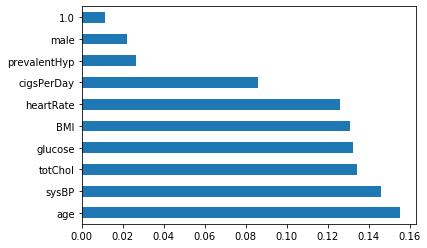

In [110]:
# Feature Importance
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [111]:
df_en.head()

,male,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,BMI,heartRate,glucose,1.0,2.0,3.0,4.0,Heart Disease
0,1,39,0.0,0.0,0,0,0,195.0,106.0,26.97,80.0,77.0,0,0,0,1,0
1,0,46,0.0,0.0,0,0,0,250.0,121.0,28.73,95.0,76.0,0,1,0,0,0
2,1,48,20.0,0.0,0,0,0,245.0,127.5,25.34,75.0,70.0,1,0,0,0,0
3,0,61,30.0,0.0,0,1,0,225.0,150.0,28.58,65.0,103.0,0,0,1,0,1
4,0,46,23.0,0.0,0,0,0,285.0,130.0,23.10,85.0,85.0,0,0,1,0,0


In [112]:
df_en = df_en.drop(columns = ['BPMeds','prevalentStroke','diabetes'])

In [113]:
X.isnull().sum()

male               0
age                0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
BMI                0
heartRate          0
glucose            0
1.0                0
2.0                0
3.0                0
4.0                0
dtype: int64

In [114]:
df_en.head()

,male,age,cigsPerDay,prevalentHyp,totChol,sysBP,BMI,heartRate,glucose,1.0,2.0,3.0,4.0,Heart Disease
0,1,39,0.0,0,195.0,106.0,26.97,80.0,77.0,0,0,0,1,0
1,0,46,0.0,0,250.0,121.0,28.73,95.0,76.0,0,1,0,0,0
2,1,48,20.0,0,245.0,127.5,25.34,75.0,70.0,1,0,0,0,0
3,0,61,30.0,1,225.0,150.0,28.58,65.0,103.0,0,0,1,0,1
4,0,46,23.0,0,285.0,130.0,23.10,85.0,85.0,0,0,1,0,0


In [115]:
X = df_en.iloc[:,:13]
y = df_en.iloc[:,13]
X

,male,age,cigsPerDay,prevalentHyp,totChol,sysBP,BMI,heartRate,glucose,1.0,2.0,3.0,4.0
0,1,39,0.0,0,195.0,106.0,26.970,80.0,77.0,0,0,0,1
1,0,46,0.0,0,250.0,121.0,28.730,95.0,76.0,0,1,0,0
2,1,48,20.0,0,245.0,127.5,25.340,75.0,70.0,1,0,0,0
3,0,61,30.0,1,225.0,150.0,28.580,65.0,103.0,0,0,1,0
4,0,46,23.0,0,285.0,130.0,23.100,85.0,85.0,0,0,1,0
5,0,43,0.0,1,228.0,180.0,30.300,77.0,99.0,0,1,0,0
6,0,63,0.0,0,205.0,138.0,33.110,60.0,85.0,1,0,0,0
7,0,45,20.0,0,313.0,100.0,21.680,79.0,78.0,0,1,0,0
8,1,52,0.0,1,260.0,141.5,26.360,76.0,79.0,1,0,0,0
9,1,43,30.0,1,225.0,162.0,23.610,93.0,88.0,1,0,0,0


In [116]:
y

0       0
1       0
2       0
3       1
4       0
5       0
6       1
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      1
16      0
17      1
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      1
26      0
27      0
28      1
29      0
       ..
4210    0
4211    0
4212    0
4213    1
4214    1
4215    0
4216    0
4217    0
4218    0
4219    0
4220    1
4221    1
4222    0
4223    1
4224    0
4225    0
4226    1
4227    0
4228    0
4229    0
4230    0
4231    0
4232    1
4233    1
4234    0
4235    0
4236    0
4237    0
4238    0
4239    0
Name: Heart Disease, Length: 4240, dtype: int64

In [117]:
##Divide the data as train & test using train test split with test as 0.20 size
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=15)

In [118]:
# Run algorithms using 20-fold cross validation
num_folds = 20
scoring = 'accuracy'
seedNum = 777
models = []
models.append(('LR', LogisticRegression(random_state=seedNum)))
models.append(('CART', DecisionTreeClassifier(random_state=seedNum)))
models.append(('NB', GaussianNB()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVM', SVC(random_state=seedNum)))
models.append(('RF', RandomForestClassifier(random_state=seedNum)))
models.append(('AB', AdaBoostClassifier(random_state=seedNum)))
models.append(('GBM', GradientBoostingClassifier(random_state=seedNum)))
results = []
names = []
metrics = []

In [119]:
from datetime import datetime
# Generate model in turn
for name, model in models:
    startTimeModule = datetime.now()
    kfold = KFold(n_splits=num_folds, random_state=seedNum)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    metrics.append(cv_results.mean())
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    print ('Model training time:',(datetime.now() - startTimeModule))
print ('Average metrics ('+scoring+') from all models:',np.mean(metrics))

LR: 0.848507 (0.024834)
Model training time: 0:00:02.317518
CART: 0.760954 (0.029140)
Model training time: 0:00:00.674851
NB: 0.799267 (0.023827)
Model training time: 0:00:00.289319
KNN: 0.823723 (0.028186)
Model training time: 0:00:01.061186
SVM: 0.845263 (0.027596)
Model training time: 0:00:23.037175
RF: 0.833463 (0.024790)
Model training time: 0:00:02.184482
AB: 0.840265 (0.027715)
Model training time: 0:00:06.980953
GBM: 0.845564 (0.023325)
Model training time: 0:00:13.615788
Average metrics (accuracy) from all models: 0.8246256091193874


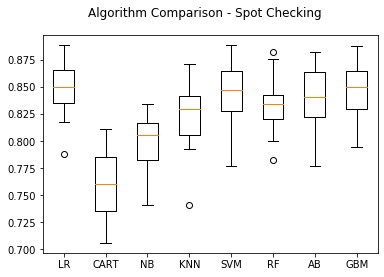

In [120]:
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison - Spot Checking')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [121]:
# Improve Accuracy
# a) Algorithm Tuning
# Set up the comparison array
results = []
names = []

# Tuning algorithm #1 - RandomForestClassifier
startTimeModule = datetime.now()
paramGrid4 = dict(n_estimators=np.array([600,700,800]),max_depth = np.array([2,3,4]),n_jobs = np.array([1,2,3]))
model4 = RandomForestClassifier(random_state=seedNum)
kfold = KFold(n_splits=num_folds, random_state=seedNum)
grid4 = GridSearchCV(estimator=model4, param_grid=paramGrid4, scoring=scoring, cv=kfold)
grid_result4 = grid4.fit(X_train, y_train)

In [122]:
print("Best: %f using %s" % (grid_result4.best_score_, grid_result4.best_params_))
results.append(grid_result4.cv_results_['mean_test_score'])
names.append('RF')
means = grid_result4.cv_results_['mean_test_score']
stds = grid_result4.cv_results_['std_test_score']
params = grid_result4.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
print ('Model training time:',(datetime.now() - startTimeModule))

Best: 0.845224 using {'max_depth': 2, 'n_estimators': 600, 'n_jobs': 1}
0.845224 (0.027606) with: {'max_depth': 2, 'n_estimators': 600, 'n_jobs': 1}
0.845224 (0.027606) with: {'max_depth': 2, 'n_estimators': 600, 'n_jobs': 2}
0.845224 (0.027606) with: {'max_depth': 2, 'n_estimators': 600, 'n_jobs': 3}
0.845224 (0.027606) with: {'max_depth': 2, 'n_estimators': 700, 'n_jobs': 1}
0.845224 (0.027606) with: {'max_depth': 2, 'n_estimators': 700, 'n_jobs': 2}
0.845224 (0.027606) with: {'max_depth': 2, 'n_estimators': 700, 'n_jobs': 3}
0.845224 (0.027606) with: {'max_depth': 2, 'n_estimators': 800, 'n_jobs': 1}
0.845224 (0.027606) with: {'max_depth': 2, 'n_estimators': 800, 'n_jobs': 2}
0.845224 (0.027606) with: {'max_depth': 2, 'n_estimators': 800, 'n_jobs': 3}
0.845224 (0.027606) with: {'max_depth': 3, 'n_estimators': 600, 'n_jobs': 1}
0.845224 (0.027606) with: {'max_depth': 3, 'n_estimators': 600, 'n_jobs': 2}
0.845224 (0.027606) with: {'max_depth': 3, 'n_estimators': 600, 'n_jobs': 3}
0.84

In [137]:
# Tuning algorithm #2 - Stochastic Gradient Boosting
startTimeModule = datetime.now()
paramGrid5 = dict(n_estimators=np.array([600,700,800]),learning_rate = np.array([0.2,0.3,0.4]))
model5 = GradientBoostingClassifier(random_state=seedNum)
kfold = KFold(n_splits=num_folds, random_state=seedNum)
grid5 = GridSearchCV(estimator=model5, param_grid=paramGrid5, scoring=scoring, cv=kfold)
grid_result5 = grid5.fit(X_train, y_train)

print("Best: %f using %s" % (grid_result5.best_score_, grid_result5.best_params_))
results.append(grid_result5.cv_results_['mean_test_score'])
names.append('GBM')
means = grid_result5.cv_results_['mean_test_score']
stds = grid_result5.cv_results_['std_test_score']
params = grid_result5.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
print ('Model training time:',(datetime.now() - startTimeModule))

Best: 0.815153 using {'learning_rate': 0.2, 'n_estimators': 600}
0.815153 (0.027494) with: {'learning_rate': 0.2, 'n_estimators': 600}
0.808373 (0.028367) with: {'learning_rate': 0.2, 'n_estimators': 700}
0.809552 (0.027883) with: {'learning_rate': 0.2, 'n_estimators': 800}
0.807783 (0.025673) with: {'learning_rate': 0.3, 'n_estimators': 600}
0.808078 (0.025719) with: {'learning_rate': 0.3, 'n_estimators': 700}
0.810731 (0.024839) with: {'learning_rate': 0.3, 'n_estimators': 800}
0.805425 (0.024630) with: {'learning_rate': 0.4, 'n_estimators': 600}
0.801887 (0.024768) with: {'learning_rate': 0.4, 'n_estimators': 700}
0.805130 (0.027959) with: {'learning_rate': 0.4, 'n_estimators': 800}
Model training time: 0:08:18.872805


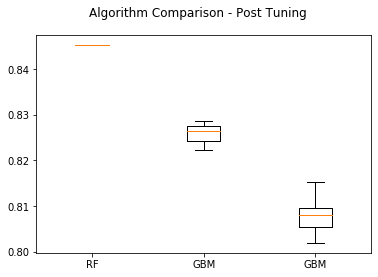

In [138]:
# Compare Algorithms After Tuning
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison - Post Tuning')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [129]:
#predicting values
y_pred_rf = grid_result4.predict(X_test)
y_pred_rf

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [130]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_rf)

array([[729,   0],
       [119,   0]], dtype=int64)

In [131]:
# Accuracy score for RandomForestClassifier
accuracy_score(y_test, y_pred_rf)

0.8596698113207547

##### Saving the model

In [132]:
# Save the model by using joblib
from sklearn.externals import joblib  
joblib.dump(models , 'Heart_Disease_Prediction.pkl') 

['Heart_Disease_Prediction.pkl']

##### Loading the model

In [133]:
# Load the model from the file 
models_from_joblib = joblib.load('Heart_Disease_Prediction.pkl')  

In [134]:
df_en.head()

,male,age,cigsPerDay,prevalentHyp,totChol,sysBP,BMI,heartRate,glucose,1.0,2.0,3.0,4.0,Heart Disease
0,1,39,0.0,0,195.0,106.0,26.97,80.0,77.0,0,0,0,1,0
1,0,46,0.0,0,250.0,121.0,28.73,95.0,76.0,0,1,0,0,0
2,1,48,20.0,0,245.0,127.5,25.34,75.0,70.0,1,0,0,0,0
3,0,61,30.0,1,225.0,150.0,28.58,65.0,103.0,0,0,1,0,1
4,0,46,23.0,0,285.0,130.0,23.10,85.0,85.0,0,0,1,0,0


## Analysis :

##### 1. I have applied all the algorithms as asked and have trained my model on them.I get 3 algorithms i.e. 'AdaBoost Classifier','Stochastic Gradient Boosting' and 'Random Forest Classifier' with a good accuracy
##### 2. I have tuned the 3 algorithms using the hyperparameters and I find Random Forest model giving a better accuracy of '86.0' %. So I will be using this model for my future predictions.